In [1]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy import stats
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

In [2]:
#Load Data in Dataframe and verify load time
start_time = time.time()
train_data = pd.read_csv('Train25.csv')
#train_data = pd.read_csv('train_data.csv')

print("--- %s seconds ---" % (time.time() - start_time))
train_data

--- 94.38252592086792 seconds ---


,Unnamed: 0,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,4580744,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...,2018-03-17,0.927437,0.007716,0.002012,0.811036,0.001816,0.145747,0.005826,...,NaN,NaN,NaN,0.003616,0.006932,0.008604,NaN,0.003723,0.008369,0.007014
1,1129269,3423938309c0311e273f994fb75c17c051248bec00b142...,2018-02-27,0.692903,0.007248,0.008110,0.813047,0.001296,0.182255,0.008221,...,NaN,NaN,NaN,0.005810,0.007510,0.001479,NaN,0.008584,0.003927,0.000265
2,786878,24830d3e3a6739380c1e4f410cdbc1cccd8670ca4efac5...,2017-10-25,0.760664,0.007164,0.003502,0.816307,0.008692,NaN,0.004170,...,NaN,NaN,NaN,0.004483,0.000421,0.003531,NaN,0.005391,0.001890,0.008278
3,417099,136e58c0698fa15569bbb189ed3f67d4d0773eb1f40475...,2017-07-14,0.541180,0.006883,0.592058,0.043188,0.005739,0.140962,0.009141,...,NaN,NaN,NaN,0.001435,0.003579,0.004951,NaN,0.007757,0.002797,0.000894
4,2559303,7613e081c2fa384bfb6b1df0bab37a0ef29a27cccf5e83...,2017-11-17,0.368668,0.031484,0.453274,0.027807,0.002330,0.263603,0.002230,...,NaN,NaN,NaN,0.006034,0.007786,0.009002,NaN,0.008526,0.003591,0.007756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382857,1976281,5b3ced2cebbe1d518a3a6645fe165577cdaa210e61579a...,2017-05-27,0.606872,0.391428,0.039005,1.008506,0.008201,0.038661,0.007313,...,0.25668,0.004762,0.005549,0.005664,0.007183,0.009182,NaN,0.001837,0.007191,0.001326
1382858,3251323,96380ff3221345f0c80f61597c355958598646b3e024f7...,2017-07-22,0.875765,0.001855,0.030664,1.002463,0.001630,0.104359,0.003367,...,NaN,NaN,NaN,0.009151,0.009526,0.007361,NaN,0.003853,0.009707,0.007231
1382859,3589440,a5d08297343d1c9a6cc82eff919d41ffa5179e95fbb38d...,2017-08-12,0.885838,0.003589,0.008111,1.005659,0.006098,0.144282,0.009497,...,NaN,NaN,NaN,0.006675,0.009127,0.000342,NaN,0.001308,0.009470,0.007563
1382860,1929743,590d8d936b5e7ff008f53b3a34a23e0b26c46c5604f5fa...,2017-10-22,0.773597,0.594307,0.208508,0.073353,0.008069,0.151430,0.001763,...,NaN,NaN,NaN,0.001862,0.003412,0.008345,NaN,0.004714,0.000869,0.008088


In [3]:
#Load Labels Data in Dataframe and verify load time
start_time = time.time()
train_labels = pd.read_csv('train_labels.csv')
print("--- %s seconds ---" % (time.time() - start_time))
train_labels

--- 0.8754079341888428 seconds ---


,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1


In [4]:
#train_data = train_data.join(train_labels, on='customer_ID')
train_data = pd.merge(train_data, train_labels, on='customer_ID')
train_data

,Unnamed: 0,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,4580744,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...,2018-03-17,0.927437,0.007716,0.002012,0.811036,0.001816,0.145747,0.005826,...,NaN,NaN,0.003616,0.006932,0.008604,NaN,0.003723,0.008369,0.007014,0
1,4580735,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...,2017-06-16,0.931875,0.009972,0.004723,0.812552,0.004969,NaN,0.008166,...,NaN,NaN,0.001690,0.006082,0.009000,NaN,0.002809,0.002951,0.006065,0
2,4580733,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...,2017-04-15,0.936455,0.036248,0.028009,0.818884,0.006339,NaN,0.008284,...,NaN,NaN,0.007555,0.006555,0.002374,NaN,0.003539,0.002715,0.000628,0
3,4580736,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...,2017-07-17,0.925237,0.002328,0.005986,0.818650,0.001289,NaN,0.007104,...,NaN,NaN,0.008696,0.009739,0.008215,NaN,0.001343,0.008787,0.006253,0
4,4580732,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...,2017-03-17,0.853476,0.000166,0.007858,0.811090,0.004103,NaN,0.009790,...,NaN,NaN,0.003995,0.003113,0.009419,NaN,0.009438,0.000763,0.003817,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382857,4771497,dc8caa8e3223cafa8adea3061493034ba806b1a53cc843...,2017-05-11,0.845592,0.008302,0.027152,0.810376,0.000362,0.093131,0.006670,...,NaN,NaN,0.007781,0.000709,0.002118,NaN,0.003699,0.000433,0.005024,0
1382858,2643157,7a00bfc2c39c303bf3b7deeb2a146bf6a35f57d6a09082...,2018-01-16,0.512331,0.066719,0.258766,0.054134,0.009598,0.141616,0.003534,...,NaN,NaN,0.003375,0.002814,0.004659,NaN,0.009982,0.004349,0.007805,0
1382859,831243,269178153e482bdf6a94b294c6a153b9bcfe7ef7ca2c04...,2017-05-11,0.972914,0.598166,0.044332,1.004104,0.001686,0.137311,0.006085,...,NaN,NaN,0.005686,0.007714,0.005633,NaN,0.000416,0.002774,0.000848,0
1382860,387143,12069a58bc24ae6661b9988d70e716426178c4185bc5f2...,2018-03-16,0.116854,0.622150,0.150316,0.055931,1.003595,0.220425,0.280979,...,NaN,NaN,1.004266,0.006791,0.861576,0.01597,1.009716,0.008985,0.100165,1


In [5]:
train_data = train_data[train_data['target'].notna()]
train_data

,Unnamed: 0,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,4580744,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...,2018-03-17,0.927437,0.007716,0.002012,0.811036,0.001816,0.145747,0.005826,...,NaN,NaN,0.003616,0.006932,0.008604,NaN,0.003723,0.008369,0.007014,0
1,4580735,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...,2017-06-16,0.931875,0.009972,0.004723,0.812552,0.004969,NaN,0.008166,...,NaN,NaN,0.001690,0.006082,0.009000,NaN,0.002809,0.002951,0.006065,0
2,4580733,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...,2017-04-15,0.936455,0.036248,0.028009,0.818884,0.006339,NaN,0.008284,...,NaN,NaN,0.007555,0.006555,0.002374,NaN,0.003539,0.002715,0.000628,0
3,4580736,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...,2017-07-17,0.925237,0.002328,0.005986,0.818650,0.001289,NaN,0.007104,...,NaN,NaN,0.008696,0.009739,0.008215,NaN,0.001343,0.008787,0.006253,0
4,4580732,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...,2017-03-17,0.853476,0.000166,0.007858,0.811090,0.004103,NaN,0.009790,...,NaN,NaN,0.003995,0.003113,0.009419,NaN,0.009438,0.000763,0.003817,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382857,4771497,dc8caa8e3223cafa8adea3061493034ba806b1a53cc843...,2017-05-11,0.845592,0.008302,0.027152,0.810376,0.000362,0.093131,0.006670,...,NaN,NaN,0.007781,0.000709,0.002118,NaN,0.003699,0.000433,0.005024,0
1382858,2643157,7a00bfc2c39c303bf3b7deeb2a146bf6a35f57d6a09082...,2018-01-16,0.512331,0.066719,0.258766,0.054134,0.009598,0.141616,0.003534,...,NaN,NaN,0.003375,0.002814,0.004659,NaN,0.009982,0.004349,0.007805,0
1382859,831243,269178153e482bdf6a94b294c6a153b9bcfe7ef7ca2c04...,2017-05-11,0.972914,0.598166,0.044332,1.004104,0.001686,0.137311,0.006085,...,NaN,NaN,0.005686,0.007714,0.005633,NaN,0.000416,0.002774,0.000848,0
1382860,387143,12069a58bc24ae6661b9988d70e716426178c4185bc5f2...,2018-03-16,0.116854,0.622150,0.150316,0.055931,1.003595,0.220425,0.280979,...,NaN,NaN,1.004266,0.006791,0.861576,0.01597,1.009716,0.008985,0.100165,1


In [6]:
y = pd.DataFrame(train_data[['target']])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [7]:
#Data types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382862 entries, 0 to 1382861
Columns: 192 entries, Unnamed: 0 to target
dtypes: float64(185), int64(3), object(4)
memory usage: 2.0+ GB


In [8]:
#function for extracting objects
def getObjectCol(df):
    DType = ['object']
    df = df.select_dtypes(include=DType)
        
    return df

In [9]:
#function for extracting numerical
def getNumericCol(df):
    DType = ['float64','int64']
    df = df.select_dtypes(include=DType)
        
    return df

In [10]:
#Segregate ID Columns
train_data_ID = train_data[['Unnamed: 0','customer_ID']]
train_data_ID.head()

,Unnamed: 0,customer_ID
0,4580744,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...
1,4580735,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...
2,4580733,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...
3,4580736,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...
4,4580732,d3cbc7762fa018a0c0cccd8a89fb9d54a26f9097569389...


In [11]:
#Segregate Catagorical
train_data_Cat = train_data[['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']]
train_data_Cat.head()

,B_30,B_38,D_114,D_116,D_117,D_120,D_126,D_63,D_64,D_66,D_68
0,0.0,2.0,1.0,0.0,3.0,1.0,1.0,CO,O,1.0,6.0
1,0.0,1.0,1.0,0.0,2.0,0.0,1.0,CO,O,1.0,6.0
2,0.0,1.0,1.0,0.0,2.0,0.0,-1.0,CO,O,1.0,6.0
3,0.0,1.0,1.0,0.0,2.0,0.0,1.0,CO,O,1.0,6.0
4,0.0,1.0,1.0,0.0,2.0,0.0,-1.0,CO,O,1.0,6.0


In [12]:
#Drop Id and Cat Columns
train_data2 = train_data.drop(columns=['Unnamed: 0'])
train_data2 = train_data2.drop(columns=['customer_ID'])
train_data2 = train_data2.drop(columns=['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68'])

In [13]:
#Show object col
train_data2_objects = getObjectCol(train_data2)
train_data2_objects.head()

,S_2
0,2018-03-17
1,2017-06-16
2,2017-04-15
3,2017-07-17
4,2017-03-17


In [14]:
#Change S_2 to DateTime
train_data2_objects['S_2'] = \
pd.to_datetime(train_data2_objects['S_2'])
train_data2_objects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382862 entries, 0 to 1382861
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   S_2     1382862 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 21.1 MB


In [15]:
#Unique values on D_63
train_data_Cat['D_63'].unique()

array(['CO', 'CL', 'CR', 'XM', 'XZ', 'XL'], dtype=object)

In [16]:
#Unique values on D_64
train_data_Cat['D_64'].unique()

array(['O', nan, 'R', 'U', '-1'], dtype=object)

In [17]:
#show percentage of null values
def nullVals(df):
    return round(df.isnull().sum() / df.shape[0] *100,2)

In [18]:
#Checking percantage of null values in objects
nullVals(train_data_Cat)

B_30      0.04
B_38      0.04
D_114     3.17
D_116     3.17
D_117     3.17
D_120     3.17
D_126     2.10
D_63      0.00
D_64      3.91
D_66     88.74
D_68      3.90
dtype: float64

In [19]:
#Show Numeric col
train_data_numeric = getNumericCol(train_data)
train_data_numeric

,Unnamed: 0,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,4580744,0.927437,0.007716,0.002012,0.811036,0.001816,0.145747,0.005826,0.005554,NaN,...,NaN,NaN,0.003616,0.006932,0.008604,NaN,0.003723,0.008369,0.007014,0
1,4580735,0.931875,0.009972,0.004723,0.812552,0.004969,NaN,0.008166,0.000992,NaN,...,NaN,NaN,0.001690,0.006082,0.009000,NaN,0.002809,0.002951,0.006065,0
2,4580733,0.936455,0.036248,0.028009,0.818884,0.006339,NaN,0.008284,0.005814,NaN,...,NaN,NaN,0.007555,0.006555,0.002374,NaN,0.003539,0.002715,0.000628,0
3,4580736,0.925237,0.002328,0.005986,0.818650,0.001289,NaN,0.007104,0.008613,NaN,...,NaN,NaN,0.008696,0.009739,0.008215,NaN,0.001343,0.008787,0.006253,0
4,4580732,0.853476,0.000166,0.007858,0.811090,0.004103,NaN,0.009790,0.003384,NaN,...,NaN,NaN,0.003995,0.003113,0.009419,NaN,0.009438,0.000763,0.003817,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382857,4771497,0.845592,0.008302,0.027152,0.810376,0.000362,0.093131,0.006670,0.003630,NaN,...,NaN,NaN,0.007781,0.000709,0.002118,NaN,0.003699,0.000433,0.005024,0
1382858,2643157,0.512331,0.066719,0.258766,0.054134,0.009598,0.141616,0.003534,0.329521,NaN,...,NaN,NaN,0.003375,0.002814,0.004659,NaN,0.009982,0.004349,0.007805,0
1382859,831243,0.972914,0.598166,0.044332,1.004104,0.001686,0.137311,0.006085,0.004180,NaN,...,NaN,NaN,0.005686,0.007714,0.005633,NaN,0.000416,0.002774,0.000848,0
1382860,387143,0.116854,0.622150,0.150316,0.055931,1.003595,0.220425,0.280979,0.236893,NaN,...,NaN,NaN,1.004266,0.006791,0.861576,0.01597,1.009716,0.008985,0.100165,1


In [20]:
#Checking percantage of null values in numeric
numericNulls = nullVals(train_data_numeric)
numericNulls

Unnamed: 0     0.00
P_2            0.84
D_39           0.00
B_1            0.00
B_2            0.04
              ...  
D_142         82.91
D_143          1.82
D_144          0.74
D_145          1.82
target         0.00
Length: 188, dtype: float64

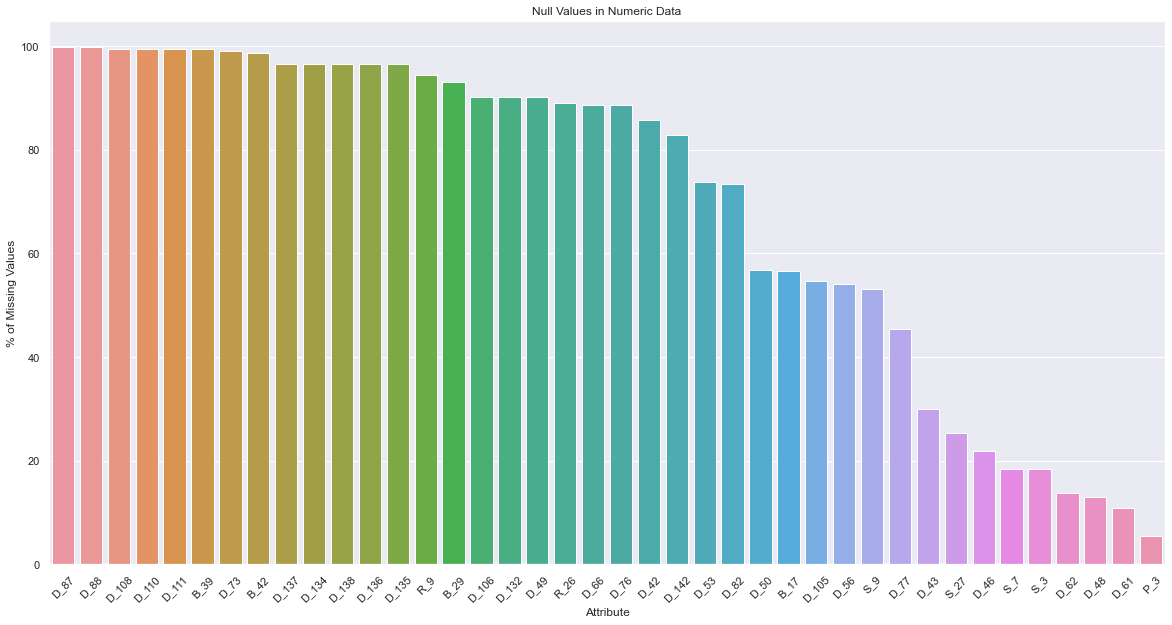

In [21]:
#nulss above limit
pctNulls = 5
numericNulls = numericNulls[numericNulls > pctNulls]

#To DF
numericNullsDf = numericNulls.to_frame(name = 'numericNulls')
numericNullsDf = numericNullsDf.sort_values('numericNulls',\
                                            ascending=False)

# figure for missing values
sns.set_theme(style="darkgrid")
ax = plt.subplots(figsize=(20,10), sharex=True)

ax = sns.barplot(x=numericNullsDf.index,\
                 y=numericNullsDf.numericNulls,\
                 data=numericNullsDf)

ax.set(title='Null Values in Numeric Data')
ax.set(xlabel="Attribute", ylabel='% of Missing Values')

plt.xticks(rotation=45)
plt.show()

In [22]:
print('Number of columns with nulls above ' + \
      str(pctNulls) + '% is -> ' + str(numericNulls.shape[0]))

Number of columns with nulls above 5% is -> 40


In [23]:
#Limit of nulls aceptable
x = 20
numericNullsDf_aboveXpct = numericNullsDf[numericNullsDf > x].dropna()
cols2Drop = numericNullsDf_aboveXpct.index
cols2Drop

Index(['D_87', 'D_88', 'D_108', 'D_110', 'D_111', 'B_39', 'D_73', 'B_42',
       'D_137', 'D_134', 'D_138', 'D_136', 'D_135', 'R_9', 'B_29', 'D_106',
       'D_132', 'D_49', 'R_26', 'D_66', 'D_76', 'D_42', 'D_142', 'D_53',
       'D_82', 'D_50', 'B_17', 'D_105', 'D_56', 'S_9', 'D_77', 'D_43', 'S_27',
       'D_46'],
      dtype='object')

In [24]:
#Drop variables with to many nulls
train_data_numeric_clean = train_data_numeric.drop(columns= cols2Drop)
train_data_numeric_clean

,Unnamed: 0,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_44,...,D_131,D_133,R_28,D_139,D_140,D_141,D_143,D_144,D_145,target
0,4580744,0.927437,0.007716,0.002012,0.811036,0.001816,0.145747,0.005826,0.005554,0.007046,...,0.009348,0.009336,0.009804,0.003616,0.006932,0.008604,0.003723,0.008369,0.007014,0
1,4580735,0.931875,0.009972,0.004723,0.812552,0.004969,NaN,0.008166,0.000992,0.006304,...,0.004523,0.000205,0.004224,0.001690,0.006082,0.009000,0.002809,0.002951,0.006065,0
2,4580733,0.936455,0.036248,0.028009,0.818884,0.006339,NaN,0.008284,0.005814,0.000072,...,0.007592,0.005379,0.000345,0.007555,0.006555,0.002374,0.003539,0.002715,0.000628,0
3,4580736,0.925237,0.002328,0.005986,0.818650,0.001289,NaN,0.007104,0.008613,0.009497,...,0.009659,0.004786,0.006044,0.008696,0.009739,0.008215,0.001343,0.008787,0.006253,0
4,4580732,0.853476,0.000166,0.007858,0.811090,0.004103,NaN,0.009790,0.003384,0.007952,...,0.000802,0.008492,0.009327,0.003995,0.003113,0.009419,0.009438,0.000763,0.003817,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382857,4771497,0.845592,0.008302,0.027152,0.810376,0.000362,0.093131,0.006670,0.003630,NaN,...,0.007144,0.005419,0.004626,0.007781,0.000709,0.002118,0.003699,0.000433,0.005024,0
1382858,2643157,0.512331,0.066719,0.258766,0.054134,0.009598,0.141616,0.003534,0.329521,0.375819,...,0.007631,0.008373,0.009802,0.003375,0.002814,0.004659,0.009982,0.004349,0.007805,0
1382859,831243,0.972914,0.598166,0.044332,1.004104,0.001686,0.137311,0.006085,0.004180,0.008611,...,0.003318,0.005751,0.003204,0.005686,0.007714,0.005633,0.000416,0.002774,0.000848,0
1382860,387143,0.116854,0.622150,0.150316,0.055931,1.003595,0.220425,0.280979,0.236893,0.002689,...,0.009134,0.008296,0.001512,1.004266,0.006791,0.861576,1.009716,0.008985,0.100165,1


In [25]:
#Correlation Matrix
corr = train_data_numeric_clean.corr().abs()

In [26]:
#Top Correlations
topCorr = corr.unstack().sort_values(ascending=False)

topCorrDF = topCorr.to_frame()
topCorrDF.reset_index(inplace=True)
topCorrDF['Keep'] = topCorrDF['level_0'] != topCorrDF['level_1'] 
topCorrDF = topCorrDF[topCorrDF['Keep']]
topCorrDF

,level_0,level_1,0,Keep
154,D_103,D_104,0.999750,True
155,D_104,D_103,0.999750,True
156,D_143,D_139,0.999503,True
157,D_139,D_143,0.999503,True
158,D_141,D_139,0.998176,True
...,...,...,...,...
23711,R_18,S_26,0.000003,True
23712,D_116,D_144,0.000003,True
23713,D_144,D_116,0.000003,True
23714,B_10,R_25,0.000002,True


In [27]:
#High Corrlated values
topCorrDFHC = topCorrDF[topCorrDF[0] > 0.85]
topCorrDFHC

,level_0,level_1,0,Keep
154,D_103,D_104,0.999750,True
155,D_104,D_103,0.999750,True
156,D_143,D_139,0.999503,True
157,D_139,D_143,0.999503,True
158,D_141,D_139,0.998176,True
159,D_139,D_141,0.998176,True
160,D_141,D_143,0.997699,True
161,D_143,D_141,0.997699,True
162,B_1,B_11,0.995150,True
163,B_11,B_1,0.995150,True


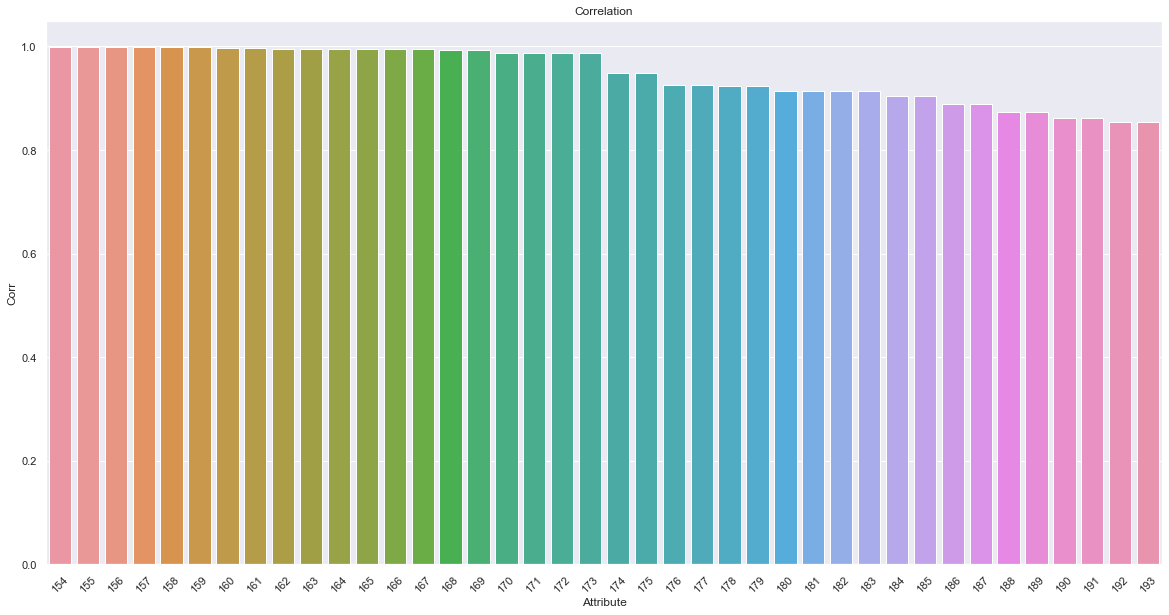

In [28]:
# figure for corrlations
sns.set_theme(style="darkgrid")
ax = plt.subplots(figsize=(20,10), sharex=True)

ax = sns.barplot(x=topCorrDFHC.index,\
                 y=topCorrDFHC[0],\
                 data=topCorrDFHC)

ax.set(title='Correlation')
ax.set(xlabel="Attribute", ylabel='Corr')

plt.xticks(rotation=45)
plt.show()

In [29]:
#Column to identify which attributes to remove
topCorrDFHC['Running'] = np.arange(len(topCorrDFHC))
topCorrDFHC

/var/folders/06/rkc92dl925n9zc06g826mq2m0000gn/T/ipykernel_8405/2292033068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topCorrDFHC['Running'] = np.arange(len(topCorrDFHC))


,level_0,level_1,0,Keep,Running
154,D_103,D_104,0.999750,True,0
155,D_104,D_103,0.999750,True,1
156,D_143,D_139,0.999503,True,2
157,D_139,D_143,0.999503,True,3
158,D_141,D_139,0.998176,True,4
159,D_139,D_141,0.998176,True,5
160,D_141,D_143,0.997699,True,6
161,D_143,D_141,0.997699,True,7
162,B_1,B_11,0.995150,True,8
163,B_11,B_1,0.995150,True,9


In [30]:
#Remove pair for high correaltions
topCorrDFHC = topCorrDFHC[topCorrDFHC.index%2==0]
topCorrDFHC

,level_0,level_1,0,Keep,Running
154,D_103,D_104,0.999750,True,0
156,D_143,D_139,0.999503,True,2
158,D_141,D_139,0.998176,True,4
160,D_141,D_143,0.997699,True,6
162,B_1,B_11,0.995150,True,8
164,B_23,B_7,0.995011,True,10
166,D_119,D_118,0.994949,True,12
168,B_37,B_1,0.992785,True,14
170,D_74,D_75,0.987611,True,16
172,B_37,B_11,0.987393,True,18


In [31]:
#Drop variables with high correlation 
train_data_numeric_clean_HC = \
train_data_numeric_clean.drop(columns= topCorrDFHC.level_0)
train_data_numeric_clean_HC

,Unnamed: 0,P_2,D_39,B_2,R_1,D_41,B_3,D_44,B_4,D_45,...,B_41,D_130,D_131,D_133,R_28,D_139,D_140,D_144,D_145,target
0,4580744,0.927437,0.007716,0.811036,0.001816,0.005826,0.005554,0.007046,0.003595,0.348216,...,0.000191,0.008312,0.009348,0.009336,0.009804,0.003616,0.006932,0.008369,0.007014,0
1,4580735,0.931875,0.009972,0.812552,0.004969,0.008166,0.000992,0.006304,0.004767,0.332139,...,0.005348,0.004321,0.004523,0.000205,0.004224,0.001690,0.006082,0.002951,0.006065,0
2,4580733,0.936455,0.036248,0.818884,0.006339,0.008284,0.005814,0.000072,0.001716,0.324494,...,0.007839,0.009662,0.007592,0.005379,0.000345,0.007555,0.006555,0.002715,0.000628,0
3,4580736,0.925237,0.002328,0.818650,0.001289,0.007104,0.008613,0.009497,0.001131,0.331189,...,0.003993,0.006505,0.009659,0.004786,0.006044,0.008696,0.009739,0.008787,0.006253,0
4,4580732,0.853476,0.000166,0.811090,0.004103,0.009790,0.003384,0.007952,0.002677,0.324480,...,0.001722,0.006998,0.000802,0.008492,0.009327,0.003995,0.003113,0.000763,0.003817,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382857,4771497,0.845592,0.008302,0.810376,0.000362,0.006670,0.003630,NaN,0.022773,0.368010,...,0.001860,0.005133,0.007144,0.005419,0.004626,0.007781,0.000709,0.000433,0.005024,0
1382858,2643157,0.512331,0.066719,0.054134,0.009598,0.003534,0.329521,0.375819,0.641524,0.435235,...,0.004794,1.000931,0.007631,0.008373,0.009802,0.003375,0.002814,0.004349,0.007805,0
1382859,831243,0.972914,0.598166,1.004104,0.001686,0.006085,0.004180,0.008611,0.081884,0.360534,...,0.000180,0.002539,0.003318,0.005751,0.003204,0.005686,0.007714,0.002774,0.000848,0
1382860,387143,0.116854,0.622150,0.055931,1.003595,0.280979,0.236893,0.002689,0.069254,0.040806,...,0.005271,0.003857,0.009134,0.008296,0.001512,1.004266,0.006791,0.008985,0.100165,1


In [32]:
Delinquency = train_data_numeric_clean_HC.filter(regex='D')
Delinquency.head()

,D_39,D_41,D_44,D_45,D_47,D_48,D_51,D_52,D_54,D_58,...,D_127,D_128,D_129,D_130,D_131,D_133,D_139,D_140,D_144,D_145
0,0.007716,0.005826,0.007046,0.348216,0.437152,0.095356,0.338425,0.085716,1.005512,0.005026,...,0.005891,0.999197,0.003513,0.008312,0.009348,0.009336,0.003616,0.006932,0.008369,0.007014
1,0.009972,0.008166,0.006304,0.332139,0.414193,0.022596,0.338711,0.067642,1.001352,0.008978,...,0.004523,1.004878,0.003063,0.004321,0.004523,0.000205,0.001690,0.006082,0.002951,0.006065
2,0.036248,0.008284,0.000072,0.324494,0.412530,0.003261,0.674811,0.069150,1.001763,0.009103,...,0.001921,1.007721,0.006351,0.009662,0.007592,0.005379,0.007555,0.006555,0.002715,0.000628
3,0.002328,0.007104,0.009497,0.331189,0.419392,0.099101,0.333561,0.072370,1.006742,0.009454,...,0.000439,1.004477,0.007785,0.006505,0.009659,0.004786,0.008696,0.009739,0.008787,0.006253
4,0.000166,0.009790,0.007952,0.324480,0.414314,NaN,0.007849,0.076771,1.002273,0.004165,...,0.000594,1.004422,0.007107,0.006998,0.000802,0.008492,0.003995,0.003113,0.000763,0.003817


In [33]:
Risk = train_data_numeric_clean_HC.filter(regex='R')
Risk.head()

,R_1,R_2,R_3,R_4,R_5,R_6,R_7,R_8,R_10,R_11,...,R_18,R_19,R_20,R_21,R_22,R_23,R_24,R_25,R_27,R_28
0,0.001816,0.005267,0.000566,0.003863,0.003794,0.005836,0.001745,0.007641,0.003388,0.003193,...,0.008905,0.007869,0.000512,0.009444,0.004845,0.003680,0.004030,0.007216,1.003566,0.009804
1,0.004969,0.007144,0.006327,0.006690,0.001448,0.008679,0.000844,0.007513,0.007760,0.002804,...,0.002470,0.001594,0.004812,0.009102,0.001306,0.004127,0.000649,0.000610,1.004596,0.004224
2,0.006339,0.005210,0.005189,0.005847,0.005555,0.002762,0.007501,0.008590,0.008538,0.005557,...,0.004027,0.000699,0.005103,0.001572,0.001301,0.002380,0.004914,0.003509,1.003659,0.000345
3,0.001289,0.000881,0.009568,0.007400,0.000563,0.001345,0.001551,0.004509,0.005019,0.003071,...,0.005800,0.009467,0.009737,0.000186,0.003067,0.004646,0.001667,0.002449,1.006008,0.006044
4,0.004103,0.001229,0.004567,0.001142,0.008566,0.005811,0.007596,0.000561,0.009778,0.009828,...,0.007027,0.007410,0.006567,0.008661,0.001624,0.009825,0.003906,0.008204,1.003585,0.009327


In [34]:
Spend = train_data_numeric_clean_HC.filter(regex='S')
Spend.head()

,S_5,S_6,S_7,S_8,S_11,S_12,S_13,S_15,S_16,S_17,S_18,S_19,S_20,S_23,S_24,S_25,S_26
0,0.003528,0.005266,0.098584,0.007254,0.283605,0.184960,0.006857,0.500016,0.001128,0.008803,0.008414,0.003294,0.001176,0.135217,0.085993,0.972734,0.131747
1,0.000460,1.004810,NaN,0.008651,0.283105,0.193651,0.006956,0.507256,0.007411,0.003645,0.009632,0.000978,0.009187,0.138668,0.080681,0.973617,0.003286
2,0.004163,1.002047,NaN,0.001198,0.280177,0.187360,0.006521,0.500443,0.007053,0.000816,0.004506,0.007588,0.005576,0.131437,0.078178,0.972992,0.006164
3,0.000023,1.000946,NaN,0.001126,0.281328,0.190375,0.008087,0.503831,0.004857,0.002596,0.001758,0.001603,0.000187,0.136478,0.077141,0.977601,0.006570
4,0.000231,1.004210,NaN,0.006380,0.289012,0.187626,0.003540,0.507549,0.003510,0.004459,0.006631,0.007878,0.007313,0.132373,0.081172,0.974066,0.001461


In [35]:
Payment = train_data_numeric_clean_HC.filter(regex='P')
Payment.head()

,P_2,P_3,P_4
0,0.927437,0.614372,0.009294
1,0.931875,0.661083,0.006046
2,0.936455,0.642370,0.006453
3,0.925237,0.605320,0.005708
4,0.853476,0.320957,0.004725


In [36]:
Balance = train_data_numeric_clean_HC.filter(regex='B')
Balance.head()

,B_2,B_3,B_4,B_5,B_6,B_7,B_8,B_9,B_10,B_11,...,B_26,B_27,B_28,B_30,B_31,B_32,B_36,B_38,B_40,B_41
0,0.811036,0.005554,0.003595,0.014009,0.234899,0.004260,0.006726,0.002579,0.300766,0.009206,...,0.002674,0.004865,0.005436,0.0,1,0.009863,0.007179,2.0,0.004068,0.000191
1,0.812552,0.000992,0.004767,0.019218,1.606071,0.003096,0.003430,0.000535,0.242152,0.002702,...,0.002376,0.002007,0.006327,0.0,1,0.002248,0.001450,1.0,0.000967,0.005348
2,0.818884,0.005814,0.001716,0.006214,1.498918,0.025083,0.003865,0.012890,0.245102,0.007328,...,0.000249,0.005574,0.005810,0.0,1,0.008849,0.003007,1.0,0.004868,0.007839
3,0.818650,0.008613,0.001131,0.001992,1.101752,0.007718,0.003073,0.000048,0.237745,0.006608,...,0.007262,0.000329,0.004361,0.0,1,0.001486,0.002611,1.0,0.007164,0.003993
4,0.811090,0.003384,0.002677,0.008312,1.512151,0.007893,0.008659,0.000022,0.242148,0.009096,...,0.007450,0.001761,0.008077,0.0,1,0.003386,0.004988,1.0,0.004885,0.001722


In [37]:
Delinquency.describe()

,D_39,D_41,D_44,D_45,D_47,D_48,D_51,D_52,D_54,D_58,...,D_127,D_128,D_129,D_130,D_131,D_133,D_139,D_140,D_144,D_145
count,1.382862e+06,1.382343e+06,1.314187e+06,1.382343e+06,1.382862e+06,1.203000e+06,1.382862e+06,1.375332e+06,1.382343e+06,1.382862e+06,...,1.382862e+06,1.357631e+06,1.357631e+06,1.357631e+06,1.357631e+06,1.372203e+06,1.357631e+06,1.372721e+06,1.372696e+06,1.357631e+06
mean,1.531865e-01,5.978309e-02,1.183263e-01,2.522715e-01,4.070805e-01,3.819608e-01,1.450472e-01,1.800181e-01,9.846189e-01,2.156481e-01,...,1.076544e-01,5.842846e-01,4.400195e-01,2.013225e-01,1.033218e-01,4.633224e-02,1.790605e-01,2.667208e-02,5.233069e-02,6.257268e-02
std,2.700303e-01,2.026389e-01,2.209929e-01,2.424714e-01,2.345539e-01,3.265911e-01,2.423010e-01,1.737084e-01,1.411792e-01,2.604048e-01,...,3.035181e-01,4.931275e-01,4.957618e-01,3.972370e-01,2.952640e-01,1.726495e-01,3.791764e-01,1.456421e-01,1.823715e-01,1.942993e-01
min,1.566353e-08,3.440668e-09,5.852338e-09,1.563241e-08,-2.662164e-02,-9.612000e-03,3.237604e-08,-7.016962e-03,-2.004074e-03,5.926659e-09,...,1.006008e-09,1.570215e-08,2.234409e-08,3.227763e-09,5.173169e-10,6.380582e-10,3.373605e-08,3.725073e-09,1.969412e-08,3.798210e-09
25%,4.542409e-03,2.876825e-03,3.824994e-03,5.474150e-02,2.323029e-01,8.120210e-02,3.646169e-03,7.388487e-02,1.002342e+00,5.862302e-03,...,2.788662e-03,5.947510e-03,4.434334e-03,3.109250e-03,2.783285e-03,2.719222e-03,3.021062e-03,2.557001e-03,2.749556e-03,3.025997e-03
50%,9.068117e-03,5.744923e-03,7.663912e-03,1.812016e-01,3.831662e-01,2.871056e-01,7.282906e-03,1.444413e-01,1.004893e+00,1.067657e-01,...,5.572799e-03,1.000426e+00,8.855433e-03,6.222280e-03,5.560199e-03,5.434812e-03,6.050439e-03,5.112718e-03,5.498853e-03,6.049355e-03
75%,2.366801e-01,8.614322e-03,1.319283e-01,3.734026e-01,5.614375e-01,6.697988e-01,3.360348e-01,2.330062e-01,1.007452e+00,3.731599e-01,...,8.355970e-03,1.004737e+00,1.004247e+00,9.329784e-03,8.335103e-03,8.163627e-03,9.082606e-03,7.663891e-03,8.257057e-03,9.083035e-03
max,5.362196e+00,8.988807e+00,4.005466e+00,1.602639e+00,1.638956e+00,8.965384e+00,2.676518e+00,1.010000e+00,1.010000e+00,1.261935e+00,...,1.010000e+00,1.021384e+00,1.010000e+00,1.023141e+00,1.491446e+00,1.509998e+00,1.010000e+00,1.010000e+00,1.343329e+00,4.827630e+00


In [38]:
X = train_data_numeric_clean_HC

In [39]:
#Drop target
X = X.drop(columns=['target'])

In [40]:
#c5.0 Model

In [41]:
amexmodel=DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=6)

In [42]:
amexmodel

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=6)

In [43]:
X.isna()

,Unnamed: 0,P_2,D_39,B_2,R_1,D_41,B_3,D_44,B_4,D_45,...,D_129,B_41,D_130,D_131,D_133,R_28,D_139,D_140,D_144,D_145
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382857,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1382858,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1382859,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1382860,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
X.isnull().sum()

Unnamed: 0        0
P_2           11570
D_39              0
B_2             519
R_1               0
              ...  
R_28              0
D_139         25231
D_140         10141
D_144         10166
D_145         25231
Length: 137, dtype: int64

In [45]:
X = X.fillna(X.mean())

In [46]:
X.isnull().sum()

Unnamed: 0    0
P_2           0
D_39          0
B_2           0
R_1           0
             ..
R_28          0
D_139         0
D_140         0
D_144         0
D_145         0
Length: 137, dtype: int64

In [47]:
amexmodel.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=6)

In [48]:
amexmodel01 = str(amexmodel)

In [49]:
y_names = ["Default", "NonDefault"]

In [51]:
export_graphviz(amexmodel, out_file = "amexmodel01.dot")

In [52]:
amexc5predict = amexmodel.predict(X)

In [53]:
amexc5predict

array([0, 0, 0, ..., 0, 1, 0])

In [54]:
from sklearn.metrics import confusion_matrix

c5cm = confusion_matrix(y, amexc5predict)
c5cm

array([[881149, 157420],
       [ 74604, 269689]])

In [55]:
c5TN = c5cm[0][0]
c5FP = c5cm[0][1]
c5FN = c5cm[1][0]
c5TP = c5cm[1][1]
print('TN: ', c5TN,
      '\nFP: ', c5FP,
      '\nFN: ', c5FN,
      '\nTP: ', c5TP,)

TN:  881149 
FP:  157420 
FN:  74604 
TP:  269689


In [56]:
c5_Accuracy = ((c5TN + c5TP)/(c5TN + c5TP + c5FP + c5FN))
c5_Accuracy

0.8322146389155245

In [57]:
c5_Error_Rate = 1-(c5_Accuracy)
c5_Error_Rate

0.1677853610844755

In [58]:
c5_sensitivty = (c5TP/(c5FP + c5TN))
c5_sensitivty

0.2596736471048144

In [59]:
c5TAN = (c5TN + c5FP)
c5GT = (c5TN + c5TP + c5FP + c5FN)
c5TAN, c5GT

(1038569, 1382862)

In [60]:
Accuracyallnegc5 = (c5TAN/c5GT)
Accuracyallnegc5

0.7510286637422968

In [61]:
#CART model

In [62]:
amexmodelcart=DecisionTreeClassifier(criterion='gini', max_depth=6, max_leaf_nodes=6)

In [63]:
amexmodelcart.fit(X,y)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=6)

In [64]:
amexmodelcart01 = str(amexmodelcart)

In [65]:
export_graphviz(amexmodelcart, out_file = "amexmodelcart.dot")

In [66]:
amexcartpredict = amexmodelcart.predict(X)
amexcartpredict

array([0, 0, 0, ..., 0, 1, 0])

In [67]:
cartcm = confusion_matrix(y, amexcartpredict)
cartcm

array([[912563, 126006],
       [ 93747, 250546]])

In [68]:
cartTN = cartcm[0][0]
cartFP = cartcm[0][1]
cartFN = cartcm[1][0]
cartTP = cartcm[1][1]
print('TN: ', cartTN,
      '\nFP: ', cartFP,
      '\nFN: ', cartFN,
      '\nTP: ', cartTP,)

TN:  912563 
FP:  126006 
FN:  93747 
TP:  250546


In [69]:
cart_Accuracy = ((cartTN + cartTP)/(cartTN + cartTP + cartFP + cartFN))
cart_Accuracy

0.8410882647726238

In [70]:
cart_sensitivty = (cartTP/(cartFP + cartTN))
cart_sensitivty

0.2412415544850655

In [71]:
#Random Forest

In [72]:
from sklearn.ensemble import RandomForestClassifier
rfy = np.ravel(y)

In [73]:
rf01 = RandomForestClassifier(n_estimators = 20, criterion="gini", max_depth=6)

In [74]:
rf01.fit(X,rfy)

RandomForestClassifier(max_depth=6, n_estimators=20)

In [75]:
rfpredictions = rf01.predict(X)
rfpredictions

array([0, 0, 0, ..., 0, 1, 0])

In [76]:
rfcm = confusion_matrix(y, rfpredictions)
rfcm

array([[954648,  83921],
       [113660, 230633]])

In [77]:
rfTN = rfcm[0][0]
rfFP = rfcm[0][1]
rfFN = rfcm[1][0]
rfTP = rfcm[1][1]
print('TN: ', rfTN,
      '\nFP: ', rfFP,
      '\nFN: ', rfFN,
      '\nTP: ', rfTP,)

TN:  954648 
FP:  83921 
FN:  113660 
TP:  230633


In [78]:
rf_Accuracy = ((rfTN + rfTP)/(rfTN + rfTP + rfFP + rfFN))
rf_Accuracy

0.8571216795312909

In [79]:
rf_sensitivty = (rfTP/(rfFP + rfTN))
rf_sensitivty

0.22206805710549804

In [80]:
# Metric from Kaggle Site

In [81]:
def amex_metric(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:

    def top_four_percent_captured(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()
        
    def weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        total_pos = (df['target'] * df['weight']).sum()
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()

    def normalized_weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        y_true_pred = y_true.rename(columns={'target': 'prediction'})
        return weighted_gini(y_true, y_pred) / weighted_gini(y_true, y_true_pred)

    g = normalized_weighted_gini(y_true, y_pred)
    d = top_four_percent_captured(y_true, y_pred)

    return 0.5 * (g + d)

In [82]:
train_data = pd.read_csv('Train25.csv',
    index_col='customer_ID',
    usecols=['customer_ID', 'P_2'])

In [83]:
train_labels = pd.read_csv('train_labels.csv', index_col='customer_ID')

In [84]:
ave_p2 = (train_data
          .groupby('customer_ID')
          .mean()
          .rename(columns={'P_2': 'prediction'}))

In [85]:
# Scale the mean P_2 by the max value and take the compliment
ave_p2['prediction'] = 1.0 - (ave_p2['prediction'] / ave_p2['prediction'].max())

In [86]:
print(amex_metric(train_labels, ave_p2))

0.508431298667124


In [87]:
# MC Evaluation of Trees

In [88]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [89]:
#import sys
#!{sys.executable} -m pip install pyarrow

In [90]:
import pyarrow as pa
import pyarrow.parquet as pq

In [91]:
testpq = pq.read_table('test.parquet')

FileNotFoundError: test.parquet

In [ ]:
testpq.to_pandas().head()

In [ ]:
# Dealing with major MemoryErrors despite using parquet files to reduce file size. 